<font color=purple> 
# Multi-Class Text Classification to  Predict Happiness Source.</font>

<font color=green> 
## Problem Statement</font>

Smile is a corpus of more than 100,000 happy moments crowd-sourced via Amazon's Mechanical Turk

Each worker is given the following task: What made you happy today? Reflect on the past 24 hours and
recall three actual events that happened to you that made you happy. Write down your happy moments
a complete sentence. (Write three such moments.)

The goal of the corpus is to advance the understanding of the causes of happiness through text-based
reflection.

<font color=green> 
**Based on the happy moment statement you have to predict the category of happiness, i.e the source of
happiness which is typically either of the following: 'bonding: 'achievement', 'affection', 'leisure',
'enjoy the moment', 'nature', 'exercise'**</font>

<font color=purple> 
# ML Internship Challenge(NLP) Pipeline to Predict Happiness Source.</font>

<font color=brown> 
### 1. Import the required libraries
### 2. Load the DataSet into Pandas Dataframe
### 3. Check  for missing values
### 4. Check the Label column and find out the count of the classes
### 5. Split the data into train & test sets
### 6. Text Preprocessing using Scikit-learn's library
### 7. Build a pipeline to vectorize the text data, then train and fit a model. After that evaluate the performance of the model on the test data based on weighted Avg F1_score-Metric.
### 8. Select the model which has high F1_score and generalizes well on the test data.
### 9. Predict the Category of Happiness on Unseen data(hm_test)
### 10.Create a dataframe(columns=[hmid,predicted_category]) and save it as CSV file for submission.
</font>
       

### 1. Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
from sklearn.pipeline import Pipeline
from sklearn import metrics

### 2. Load the DataSet into Pandas Dataframe

In [2]:
df = pd.read_csv('hm_train.csv')
df.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category
0,27673,24h,I went on a successful date with someone I fel...,1,affection
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise
3,27676,24h,We had a serious talk with some friends of our...,2,bonding
4,27677,24h,I went with grandchildren to butterfly display...,1,affection


In [97]:
df.shape # 60321 rows and 5 columns

(60321, 5)

### 3. Check for missing values

In [3]:
df.isna().sum() #No missing values

hmid                  0
reflection_period     0
cleaned_hm            0
num_sentence          0
predicted_category    0
dtype: int64

### 4. Check the Label column and find out the count of the classes

In [4]:
df.predicted_category.value_counts()

affection           20880
achievement         20274
bonding              6561
enjoy_the_moment     6508
leisure              4242
nature               1127
exercise              729
Name: predicted_category, dtype: int64

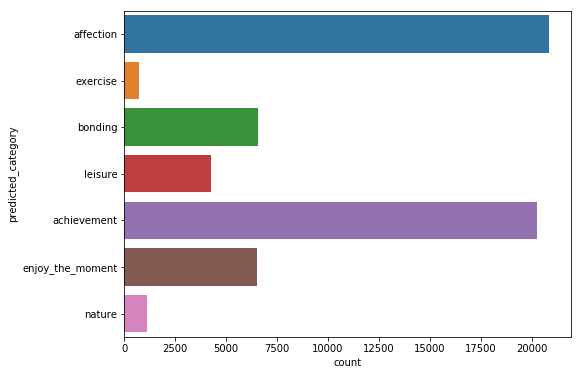

In [75]:
plt.figure(figsize=(8,6))
sns.countplot(y=df.predicted_category);

In [6]:
(df.predicted_category.value_counts(normalize=True))*100 # Relative Frequency 

affection           34.614811
achievement         33.610186
bonding             10.876809
enjoy_the_moment    10.788946
leisure              7.032377
nature               1.868338
exercise             1.208534
Name: predicted_category, dtype: float64

### Observations:
1. The label column has 7 classes.
2. The Target variable is highly imbalanced (affection and achievement has almost 70% of the data.And nature and exercise has  3% of whole data.)
3. So, inorder to evaluate the imbalaned data the best metric is weighted Average F1_score(Harmonic mean of Precision and Recall)   

### 5. Split the data into train & test sets

In [20]:
from sklearn.model_selection import train_test_split

X = df['cleaned_hm'] 
y = df['predicted_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Please use the same values for the  test_size and random_state to get same results as mine.

### 6. Text Preprocessing using Scikit-learn's library

Text preprocessing, tokenizing and the ability to filter out stopwords are all included in **TfidVectorizer**, which builds a dictionary of features and transforms the text sentences to feature vectors.**We can combine the CountVectorizer and TfidTransformer steps into one using TfidVectorizer.**

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()# Without removing stopwords

X_train_tfidf = vectorizer.fit_transform(X_train)
print(' Without removing stopwords',X_train_tfidf.shape)

 Without removing stopwords (48256, 18728)


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english') # With removing stopwords

X_train_tfidf = vectorizer.fit_transform(X_train)
print('With removing stopwords',X_train_tfidf.shape) 

With removing stopwords (48256, 18432)


### Observations:
#### This shows that our training set is comprised of 48256 rows, 18728 distinct features(words with stopwords) and 18432 distint features(without removing stopwords).

### 7. Build a pipeline to vectorize the text data, then train and fit a model. After that evaluate the performance of the model on the test data based on weighted Avg F1_score-Metric.

Well, only the **training set has been vectorized into a full vocabulary.** In order to **perform an analysis on the test set** we'll have to submit it to the same procedures.**Fortunately scikit-learn offers a Pipeline class that behaves like a compound classifier**

### Using compatible algorithms for Multi-Class text classification

### 7(a).Stochastic Gradient descent

In [21]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

model_sgd = Pipeline([('tfidf', TfidfVectorizer()),
                      ('sgd_clf', SGDClassifier())])

# Feed the training data through the pipeline
print(model_sgd.fit(X_train, y_train))

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

In [22]:
%%time

# test data predictions 
y_pred = model_sgd.predict(X_test)

Wall time: 452 ms


In [23]:
# Print a classification report
print(metrics.classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

     achievement       0.86      0.96      0.91      4091
       affection       0.94      0.97      0.95      4151
         bonding       0.96      0.93      0.94      1343
enjoy_the_moment       0.87      0.66      0.75      1230
        exercise       0.92      0.68      0.79       158
         leisure       0.91      0.75      0.82       874
          nature       0.86      0.69      0.77       218

        accuracy                           0.90     12065
       macro avg       0.90      0.81      0.85     12065
    weighted avg       0.90      0.90      0.90     12065



In [24]:
# Print weighted avg f1_score 
print(metrics.f1_score(y_test,y_pred,average='weighted'))

0.9007992889037458


### 7(b). Naive Bayes classifier for multinomial models

In [25]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

model_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('nb_clf', MultinomialNB())
           ])

# Feed the training data through the pipeline
print(model_nb.fit(X_train, y_train)) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nb_clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)
Wall time: 2.18 s


In [26]:
%%time

# test data predictions 
y_pred = model_nb.predict(X_test)

Wall time: 526 ms


In [27]:
# Print a classification report
print(metrics.classification_report(y_test,y_pred))

C:\Users\impra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                  precision    recall  f1-score   support

     achievement       0.79      0.90      0.84      4091
       affection       0.62      0.96      0.75      4151
         bonding       0.98      0.30      0.46      1343
enjoy_the_moment       0.84      0.27      0.40      1230
        exercise       0.00      0.00      0.00       158
         leisure       0.97      0.23      0.37       874
          nature       1.00      0.01      0.02       218

        accuracy                           0.71     12065
       macro avg       0.74      0.38      0.41     12065
    weighted avg       0.77      0.71      0.66     12065



In [28]:
# Print weighted avg f1_score 
print(metrics.f1_score(y_test,y_pred,average='weighted'))

0.6638489694928504


C:\Users\impra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 7(c). Linear Support Vector Classification

In [33]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

model_svc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('svc_clf', LinearSVC())
           ])

# Feeding the training data through the pipeline
print(model_svc.fit(X_train, y_train))  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc_clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
           

In [34]:
%%time
# test data predictions 
y_pred = model_svc.predict(X_test)

Wall time: 480 ms


In [35]:
# Print a classification report
print(metrics.classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

     achievement       0.92      0.94      0.93      4091
       affection       0.96      0.97      0.96      4151
         bonding       0.96      0.95      0.95      1343
enjoy_the_moment       0.86      0.85      0.85      1230
        exercise       0.85      0.78      0.81       158
         leisure       0.92      0.84      0.88       874
          nature       0.86      0.86      0.86       218

        accuracy                           0.93     12065
       macro avg       0.90      0.88      0.89     12065
    weighted avg       0.93      0.93      0.93     12065



In [36]:
# Print weighted avg f1_score 
print(metrics.f1_score(y_test,y_pred,average='weighted'))

0.930712635302962


# Using Ensemble Models

### 7(d). RandomForestClassifier

In [38]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

model_rf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('rf_clf', RandomForestClassifier(n_estimators=100))
           ])

# Feed the training data through the pipeline
model_rf.fit(X_train, y_train) 

Wall time: 3min 51s


In [39]:
%%time
# test data predictions 
y_pred = model_rf.predict(X_test)

Wall time: 906 ms


In [40]:
# Print a classification report
print(metrics.classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

     achievement       0.78      0.92      0.84      4091
       affection       0.87      0.96      0.91      4151
         bonding       0.97      0.83      0.89      1343
enjoy_the_moment       0.80      0.47      0.60      1230
        exercise       0.96      0.44      0.60       158
         leisure       0.85      0.64      0.73       874
          nature       0.84      0.44      0.58       218

        accuracy                           0.84     12065
       macro avg       0.87      0.67      0.74     12065
    weighted avg       0.84      0.84      0.83     12065



In [41]:
# Print weighted avg f1_score 
print(metrics.f1_score(y_test,y_pred,average='weighted'))

0.8311319437081026


### 7(e). GradientBoostingClassifier

In [49]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier

model_gb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('gb_clf', GradientBoostingClassifier(n_estimators=100))
           ])

# Feed the training data through the pipeline
model_gb.fit(X_train, y_train) 

Wall time: 2min 49s


In [50]:
# Form a prediction set
y_pred = model_gb.predict(X_test)

In [51]:
# Print a classification report
print(metrics.classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

     achievement       0.74      0.88      0.81      4091
       affection       0.88      0.91      0.89      4151
         bonding       0.92      0.92      0.92      1343
enjoy_the_moment       0.76      0.42      0.54      1230
        exercise       0.77      0.76      0.77       158
         leisure       0.85      0.56      0.68       874
          nature       0.79      0.59      0.68       218

        accuracy                           0.82     12065
       macro avg       0.82      0.72      0.75     12065
    weighted avg       0.82      0.82      0.81     12065



In [52]:
# Print weighted avg f1_score 
print(metrics.f1_score(y_test,y_pred,average='weighted'))

0.8092528383324278


### 7(f). XGBoostClassifier

In [53]:
%%time

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

model_xgb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('xgb_clf', XGBClassifier())
           ])

# Feed the training data through the pipeline
model_xgb.fit(X_train, y_train) 

Wall time: 1min 35s


In [54]:
%%time
# Form a prediction set
y_pred = model_xgb.predict(X_test)

Wall time: 502 ms


In [55]:
# Print a classification report
print(metrics.classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

     achievement       0.70      0.86      0.77      4091
       affection       0.84      0.90      0.86      4151
         bonding       0.93      0.91      0.92      1343
enjoy_the_moment       0.79      0.32      0.46      1230
        exercise       0.87      0.66      0.75       158
         leisure       0.84      0.53      0.65       874
          nature       0.79      0.44      0.56       218

        accuracy                           0.79     12065
       macro avg       0.82      0.66      0.71     12065
    weighted avg       0.80      0.79      0.77     12065



In [56]:
# Print weighted avg f1_score 
print(metrics.f1_score(y_test,y_pred,average='weighted'))

0.7749651931169368


### 8. Select the model which has high F1_score and generalizes well on the test data.

In [77]:
f1_score_compDF = pd.DataFrame({'Models':['Stochastic Gradient descent','Naive Bayes','Support Vector','Random Forest',
                                          'Gradiant Bossting','XgBoost'],'F1_score in %':[90,66.3,93,83.1,80.9,77.4]})

In [78]:
f1_score_compDF.sort_values(by='F1_score in %',ascending=False)

,Models,F1_score in %
2,Support Vector,93.0
0,Stochastic Gradient descent,90.0
3,Random Forest,83.1
4,Gradiant Bossting,80.9
5,XgBoost,77.4
1,Naive Bayes,66.3


<font color=green>
    
**Linear Support Vector classifier model has the highest f1_score(93 %) out of all the models. And Naive Bayes classifier has the least f1_score(66%).So, we have to select Support Vector as the best model and by using it we have to Predict the Category of Happiness on Unseen data.** </font>

### 9. Predict the Category of Happiness on Unseen data(hm_test)

<font color=purple>
    
### Build model without removing stopwords.</font>

### LinearSVC

In [124]:
%%time 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

model_svc_1 = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC())]) # Without removing stopwords

# Feed the training data through the pipeline
model_svc_1.fit(X_train, y_train)  

Wall time: 3.7 s


In [125]:
%%time

# Form a prediction set
y_pred = model_svc_1.predict(X_test)

Wall time: 483 ms


In [126]:
# Print a classification report
print(metrics.classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

     achievement       0.92      0.94      0.93      4091
       affection       0.96      0.97      0.96      4151
         bonding       0.96      0.95      0.95      1343
enjoy_the_moment       0.86      0.85      0.85      1230
        exercise       0.85      0.78      0.81       158
         leisure       0.92      0.84      0.88       874
          nature       0.86      0.86      0.86       218

        accuracy                           0.93     12065
       macro avg       0.90      0.88      0.89     12065
    weighted avg       0.93      0.93      0.93     12065



In [128]:
# Print weighted avg f1_score 
print('without removing stopwords F1_score:',metrics.f1_score(y_test,y_pred,average='weighted'))

without removing stopwords F1_score: 0.930712635302962


<font color=purple>
    
### Build model with removing stopwords.</font>

### LinearSVC

In [129]:
%%time 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

model_svc_2 = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),('clf', LinearSVC())]) # With removing stopwords

# Feed the training data through the pipeline
model_svc_2.fit(X_train, y_train) 

Wall time: 3.3 s


In [130]:
%%time

# Form a prediction set
y_pred = model_svc_2.predict(X_test)

Wall time: 443 ms


In [131]:
# Print a classification report
print(metrics.classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

     achievement       0.89      0.92      0.90      4091
       affection       0.94      0.94      0.94      4151
         bonding       0.95      0.94      0.94      1343
enjoy_the_moment       0.78      0.76      0.77      1230
        exercise       0.86      0.80      0.83       158
         leisure       0.84      0.77      0.81       874
          nature       0.81      0.82      0.81       218

        accuracy                           0.90     12065
       macro avg       0.87      0.85      0.86     12065
    weighted avg       0.90      0.90      0.90     12065



In [132]:
# Print weighted avg f1_score 
print('With removing stopwords F1_score:',metrics.f1_score(y_test,y_pred,average='weighted'))

With removing stopwords F1_score: 0.896022803228766


<font color=purple>
    
## From the above results, it shows clearly that the f1_score decreased by 3% by using the model with removing stopwords.So, for predicting the category of happiness on unseen data, we must use the model without removing stopwords for better results.</font>

### Plot a confusion matrix

In [84]:
#Function to visulise confusion matrix
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ['achievement', 'affection', 'bonding', 'enjoy_the_moment', 'exercise',
       'leisure', 'nature'] , yticklabels = ['achievement', 'affection', 'bonding', 'enjoy_the_moment', 'exercise',
       'leisure', 'nature'] , cmap="Blues")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [102]:
# Checking the Classes count for y_test data
y_testDF = pd.DataFrame(y_test)
y_testDF.predicted_category.value_counts()

affection           4151
achievement         4091
bonding             1343
enjoy_the_moment    1230
leisure              874
nature               218
exercise             158
Name: predicted_category, dtype: int64

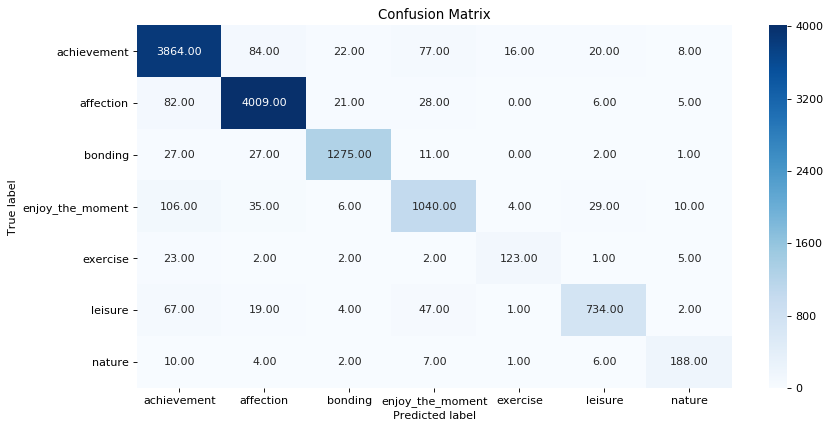

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6),dpi=80)
plt.title('Confusion Matrix')
draw_cm(y_test,y_pred)
plt.show()
# From the above cell(value_counts) we can compare for which class the model is predicting accurately.

### Load the hm_test dataset into Pandas Dataframe

In [134]:
df_test = pd.read_csv('hm_test.csv')

In [135]:
df_test.head()

,hmid,reflection_period,cleaned_hm,num_sentence
0,88305,3m,I spent the weekend in Chicago with my friends.,1
1,88306,3m,We moved back into our house after a remodel. ...,2
2,88307,3m,My fiance proposed to me in front of my family...,1
3,88308,3m,I ate lobster at a fancy restaurant with some ...,1
4,88309,3m,I went out to a nice restaurant on a date with...,5


In [136]:
df_test.shape

(40213, 4)

In [140]:
%%time

# feed the test data to predict the classes  
pred_unseen = model_svc_1.predict(df_test['cleaned_hm'])
print(pred_unseen)

['bonding' 'achievement' 'affection' ... 'affection' 'bonding' 'exercise']
Wall time: 1.42 s


In [149]:
# Manual predictions.We can cross check our model performance by creating our own sentences.
manual_pred = model_svc_1.predict(['i would like to work hard for the project assigned to me'])
manual_pred

array(['achievement'], dtype=object)

### 10. Create a dataframe(columns=[hmid,predicted_category]) and save it as csv file for submission.

In [143]:
sub = pd.DataFrame({'hmid':df_test.hmid,'predicted_category':pred_unseen})

In [144]:
sub.head(15)

,hmid,predicted_category
0,88305,bonding
1,88306,achievement
2,88307,affection
3,88308,bonding
4,88309,affection
5,88310,leisure
6,88311,achievement
7,88312,affection
8,88313,leisure
9,88314,achievement


In [145]:
sub.to_csv('Submission_SupportVectorClassifier.csv', index=False) #Saving as CSV file

In [146]:
sub.predicted_category.value_counts()

achievement         14110
affection           13462
enjoy_the_moment     4393
bonding              4129
leisure              2999
nature                676
exercise              444
Name: predicted_category, dtype: int64

<font color=green>
    
# I got an 92.3% F1_score(Evaluated only on 50% of test data) on HackerEarth ML internship Challange.</font>